![UCL](https://github.com/profLewis/Geog2021_Coursework/blob/master/images/ucl_logo.png?raw=true)

# Download and visualise data 

## Download

In this section, you will learn how to download data using a web-based app developed using Google Earth Engine (GEE). GEE has access to a large number of Earth Observation and other datasets, and makes it easy to access these and do a some processing (at least for a limited spatial extent if you want high resolution data).

You are provided with a web App built using GEE:

This is available to you as a specific [App for the Shenzhen area](https://plewis.users.earthengine.app/view/shenzhen). The use of the App should be quite intuitive, but we will outline how to use it below.

The app gives you access to 5 bands of Landsat surface reflectance data (see figure below), along with two vegetation indices, NDVI and NDWI. The datasets are annual composites, with each pixel the median of valid surface reflectance data for that year. 



![loaded](images/loaded.jpeg)

First load the App:

In [1]:
%matplotlib inline
from IPython.display import IFrame
IFrame('https://plewis.users.earthengine.app/view/shenzhen','100%',490)

By default, a composite dataset for the year 1986 is loaded, along with a rough initial classification.

You can download these datasets from this interface by clicking on:

* the [1986](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/1986/1986.zip) link to get the Landsat composite dataset
* the [header](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/1986/1986_hdr.zip) link to get the associated `envi` header files

You should download these files and *unzip* them into an appropriate directory in your Data directory (e.g. `~/Data/GEOG0027/1986`). You can also access the classification files  [class](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/1986/class1986.zip) but there is little point downloading these as we will not use them.

You can change the year of the dataset in the right-hand panel. You can also load data for multiple years, although the App response may become slow (depending on network speeds). You can clear the loaded datasets with the `Clear ...` button.
    
For example (N.B. **once you have downloaded the files**):

In [ ]:
%%bash

# where the zip files are now, *after* having downloaded them
in=./files
# where we will put the files
out=~/DATA/GEOG0027/

mkdir -p $out
unzip -u $in/1986.zip -d $out
unzip -u $in/1986_hdr.zip -d $out
mv $out/class1986/* $out

You may find it more straightforward to use any tool prompted by your browser when downloading and extracting these files. In any case, make sure that *all* files for *all* archives go into a folder that is named after the year of the dataset (`1986` here). This is important for automatic further processing later.

## Getting the data archive

Whilst you should find it instructive to download the datasets from the App, it is a little tedious to do that for all of the datasets.

For this reason, on the UCL Geography system, you can access the entire dataset from a single file.

To use this, open a Unix shell, and type the following:

In [ ]:
%%bash

data=/home/plewis/public_html/GEOG0027/gee.tar.Z 
out=~/DATA/GEOG0027/

mkdir -p $out
cd $out
tar xzf $data

If you are outside the UCL Geography system, you can access the archive file as a compressed `tar` archive from either of these links [[tar file](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/gee.tar.Z)  or [zip file](http://www2.geog.ucl.ac.uk/~plewis/GEOG0027/gee.zip)], but beware that the compressed file is `2.9G`. 

## Visualise time series

You may have noticed a time series graph on the left-hand panel of the app. This appears when you click on any location in the image panel, and provides a visualisation of the time series of reflectance (and vegetation indices) for that location. You can pop the graph out to another browser tab (the grey square with arrow in the top left of the plot). 


It will look like this:

![appgraph](images/appgraph.png)

This is useful foir giving you an idea of the land cover history of this location, so you might want to produce graphs for several locations with different cover types, to use in your report.

You can directly save the plot (`Download png` button) or save the dataset (`Download csv` button).

If you download the `csv` file, you can then produce your own plots of the data (for your report).

The example below are given in Python, but you should use whatever graphing package you are familiar with. Please make sure that (unlike below, which are for illustration only) you put full titles, labels and legends on graphs.

In [2]:
import matplotlib.pylab as plt
%matplotlib notebook
import numpy as np
import pandas as pd

d = pd.read_csv('files/ee-chart.csv')
d

,system:time_start,B1_blue,B2_green,B3_red,B4_nir,B5_swir,B6_NDVI,B7_NDWI
0,1986-06-06,0.102,0.175,0.238,0.347,0.388,0.187,-0.055
1,1987-06-06,0.103,0.177,0.227,0.299,0.412,0.136,-0.159
2,1988-06-06,0.101,0.157,0.206,0.296,0.315,0.181,-0.030
3,1989-06-06,0.104,0.158,0.192,0.262,0.295,0.154,-0.058
4,1990-06-06,0.154,0.221,0.272,0.330,0.381,0.097,-0.072
5,1991-06-06,0.133,0.187,0.211,0.260,0.300,0.105,-0.072
6,1992-06-06,0.145,0.185,0.205,0.239,0.295,0.078,-0.104
7,1993-06-06,0.144,0.188,0.205,0.249,0.293,0.098,-0.081
8,1994-06-06,0.111,0.139,0.149,0.181,0.227,0.098,-0.114
9,1995-06-06,0.114,0.136,0.137,0.170,0.213,0.109,-0.111


Note that the time label for each dataset is `YYYY-06-06`. The day and month (`06-06`) have no significance here as this is an annual composite dataset.



<IPython.core.display.Javascript object>


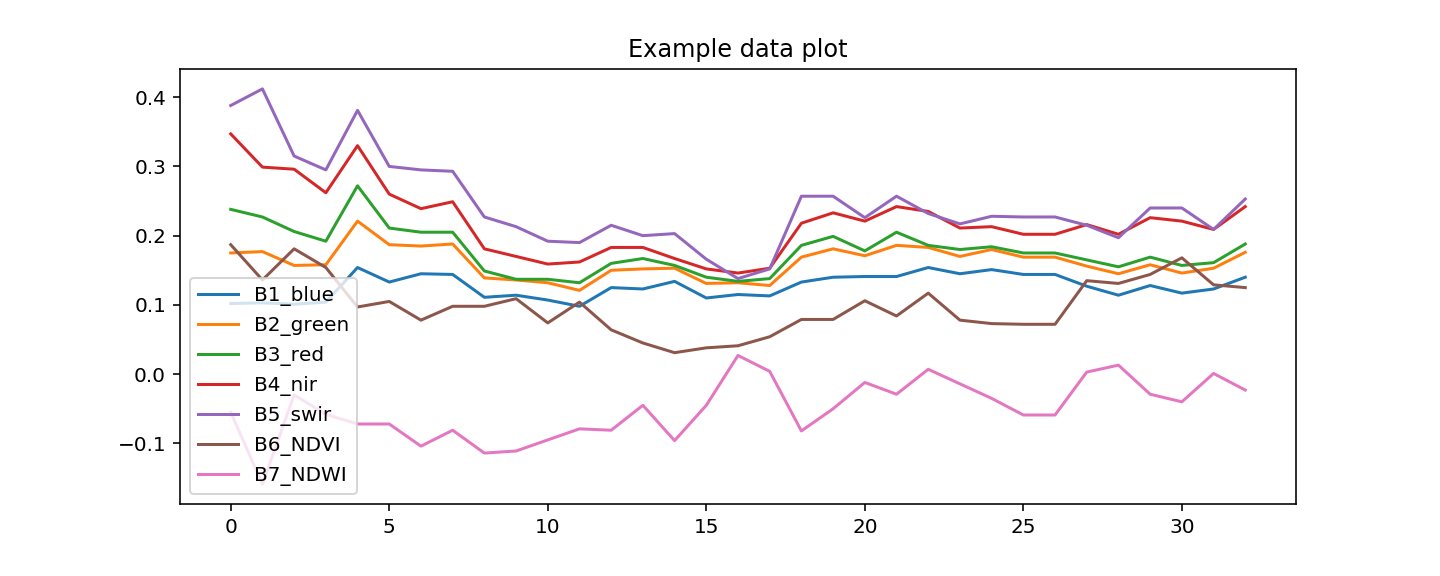

In [3]:
_=d.plot(figsize=(10,4),title='Example data plot')

## Visualise spatial data

You should be able to conveniently explore the spatial datasets in the GEE App. This is particularly useful for data interpretation (e.g. for training or validation) as you can have a map or high resolution image as a background.

You can also load multiple years of data, and visualise the dynamics.

Other than that, you will probably want to load the datasets into `envi` for visualisation. If you have correctly stored the data from the zip files, you should have in your data directory a series of sub-directories named by year, such as:

    1986	1989	1992	1995	1998	2001	2004	2007	2010	2013	2016	2019
    1987	1990	1993	1996	1999	2002	2005	2008	2011	2014	2017
    1988	1991	1994	1997	2000	2003	2006	2009	2012	2015	2018
    
Inside each of these, you should see files such as the following:

    22014.constant.tif	   2014.swir.tif
    2014.NDVI.tfw			2014.green.tfw			
    2014.NDVI.tif			2014.green.tif			
    2014.NDWI.tfw			2014.nir.tfw			
    2014.NDWI.tif			2014.nir.tif			
    2014.blue.tfw			2014.red.tfw			
    2014.blue.tif			2014.red.tif			
    2014.constant.tfw		2014.swir.tfw
    2014_Shenzhen            2014_Shenzhen.hdr
    
The file `2014_Shenzhen` is particularly important, as this is the file that you will load using `envi`.

![2014_load](images/2014_load.png)

![2014_view](images/2014_view.png)

One further file that may be of interest is the file `2014.constant.tif` which you can use as a data mask if you like. The mask has a value of zero for Shenzhen and `no data` outside of that.

![mask_image](images/mask.png)



You should load and explore the datasets you have downloaded. Provide examples of e.g. interesting spectral profiles, transects, histograms or scatter plots for your report -- things that you would normally produce as part of a data exploration exercise.

the histograms are of interest (think about what this means for classification)

![histo2014](images/histo2014.png)

and the scatterplots in many ways even more interesting:

![2014scatter](images/2014scatter.png)


You will find it particularly interesting to examine scatter plots of NDVI and NDWI for this dataset as you should see that a pretty good classification can be achieved with just these two bands of data. An advantage of this would be that the processing should be faster (fewer bands), but also that it is straightforward to visualise and appreciate the clusters that will be used to describe the land cover classes.

These are not the only 'bands' to explore though! Collect plenty of images of scatterplotas, histograms and images for your write up to illustrate particular things you find. **Don't** just put images in the report with no reference to what you are using them to show!

You should spend some time exploring these scatterplots for the different years data: are the patterns consistent? (show some evidence). Can you simply visualise (and explain) the clusters and their relationship to land cover types? In exploring the datasets you should save interesting plots to use in your write-up -- anything that helps you explain what is going on is of value!